In [853]:
import pandas as pd
import numpy as np


In [854]:
df=pd.read_csv('movies.csv')

In [855]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


## Data Cleaning

In [856]:
df.shape

(9999, 9)

In [857]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


### Duplicated values

In [858]:
print(df.duplicated().sum())

431


In [859]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


### Transformation

Transforming "VOTES" column from object to float64

In [860]:
df['VOTES'] = df['VOTES'].str.replace(',', '') 
df['VOTES'] = df['VOTES'].astype('float64')


print(df.dtypes)

MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES       float64
RunTime     float64
Gross        object
dtype: object


Converting YEAR to a clean a format

In [861]:
df['YEAR'] = df['YEAR'].str.replace(r'[()]', '', regex=True)
df['YEAR'] = df['YEAR'].str.split('–').str[0]
df['YEAR'] = df['YEAR'].str.extract('(\d+)')[0]
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df = df.dropna(subset=['YEAR'])
df['YEAR'] = df['YEAR'].astype(int)

### Handling Missing Values

In [862]:
df.isnull().sum()

MOVIES         0
YEAR           0
GENRE         22
RATING       765
ONE-LINE       0
STARS          0
VOTES        765
RunTime     1948
Gross       8473
dtype: int64

Removing Gross column as it has 9108 missing values

In [863]:
df.drop(columns=['Gross'], inplace=True)

In [864]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8933 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    8933 non-null   object 
 1   YEAR      8933 non-null   int32  
 2   GENRE     8911 non-null   object 
 3   RATING    8168 non-null   float64
 4   ONE-LINE  8933 non-null   object 
 5   STARS     8933 non-null   object 
 6   VOTES     8168 non-null   float64
 7   RunTime   6985 non-null   float64
dtypes: float64(3), int32(1), object(4)
memory usage: 593.2+ KB


In [865]:
skewness = df[['VOTES', 'RunTime', 'RATING']].skew()


print(skewness)

VOTES      11.494636
RunTime     3.648439
RATING     -0.701776
dtype: float64


In [866]:
votes_median = df['VOTES'].median()
runtime_median = df['RunTime'].median()
rating_mean = df['RATING'].mean()

df['VOTES'].fillna(votes_median, inplace=True)
df['RunTime'].fillna(runtime_median, inplace=True)
df['RATING'].fillna(rating_mean, inplace=True)



C:\Users\Akshat\AppData\Local\Temp\ipykernel_7092\4137156247.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['VOTES'].fillna(votes_median, inplace=True)
C:\Users\Akshat\AppData\Local\Temp\ipykernel_7092\4137156247.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

Dropping rows with null values

In [867]:

df.dropna(inplace=True)
print(df.isnull().sum())


MOVIES      0
YEAR        0
GENRE       0
RATING      0
ONE-LINE    0
STARS       0
VOTES       0
RunTime     0
dtype: int64


In [868]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,2021,"\nAction, Horror, Thriller",6.100000,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,21062.0,121.0
1,Masters of the Universe: Revelation,2021,"\nAnimation, Action, Adventure",5.000000,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...",17870.0,25.0
2,The Walking Dead,2010,"\nDrama, Horror, Thriller",8.200000,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",885805.0,44.0
3,Rick and Morty,2013,"\nAnimation, Adventure, Comedy",9.200000,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...",414849.0,23.0
4,Army of Thieves,2021,"\nAction, Crime, Horror",6.919699,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,792.5,60.0


In [869]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8911 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    8911 non-null   object 
 1   YEAR      8911 non-null   int32  
 2   GENRE     8911 non-null   object 
 3   RATING    8911 non-null   float64
 4   ONE-LINE  8911 non-null   object 
 5   STARS     8911 non-null   object 
 6   VOTES     8911 non-null   float64
 7   RunTime   8911 non-null   float64
dtypes: float64(3), int32(1), object(4)
memory usage: 591.7+ KB


## Statistical Analysis

In [870]:
summary_stats = df[['RATING', 'VOTES', 'RunTime']].describe()
median_values = df[['RATING', 'VOTES', 'RunTime']].median()
mode_values = df[['RATING', 'VOTES', 'RunTime']].mode()
print("Summary Statistics:\n", summary_stats)
print("\nMedian Values:\n", median_values)
print("\nMode Values:\n", mode_values)

Summary Statistics:
             RATING         VOTES      RunTime
count  8911.000000  8.911000e+03  8911.000000
mean      6.920138  1.394862e+04    66.986421
std       1.166846  6.723017e+04    42.032879
min       1.100000  5.000000e+00     1.000000
25%       6.300000  1.970000e+02    43.000000
50%       7.000000  7.925000e+02    60.000000
75%       7.700000  3.272500e+03    90.000000
max       9.900000  1.713028e+06   853.000000

Median Values:
 RATING       7.0
VOTES      792.5
RunTime     60.0
dtype: float64

Mode Values:
      RATING  VOTES  RunTime
0  6.919699  792.5     60.0


In [871]:
variance = df[['RATING', 'VOTES', 'RunTime']].var()
std_dev = df[['RATING', 'VOTES', 'RunTime']].std()
print("\nVariance:\n", variance)
print("\nStandard Deviation:\n", std_dev)



Variance:
 RATING     1.361528e+00
VOTES      4.519895e+09
RunTime    1.766763e+03
dtype: float64

Standard Deviation:
 RATING         1.166846
VOTES      67230.166283
RunTime       42.032879
dtype: float64


In [872]:

range_values = df[['RATING', 'VOTES', 'RunTime']].max() - df[['RATING', 'VOTES', 'RunTime']].min()
print("\nRange:\n", range_values)



Range:
 RATING           8.8
VOTES      1713023.0
RunTime        852.0
dtype: float64


In [873]:
Q1 = df[['RATING', 'VOTES', 'RunTime']].quantile(0.25)
Q3 = df[['RATING', 'VOTES', 'RunTime']].quantile(0.75)
IQR = Q3 - Q1
print("\nInterquartile Range (IQR):\n", IQR)



Interquartile Range (IQR):
 RATING        1.4
VOTES      3075.5
RunTime      47.0
dtype: float64


In [874]:
correlation_matrix = df[['RATING', 'VOTES', 'RunTime']].corr()

print("\nCorrelation Matrix:\n", correlation_matrix)



Correlation Matrix:
            RATING     VOTES   RunTime
RATING   1.000000  0.103635 -0.214126
VOTES    0.103635  1.000000  0.152155
RunTime -0.214126  0.152155  1.000000


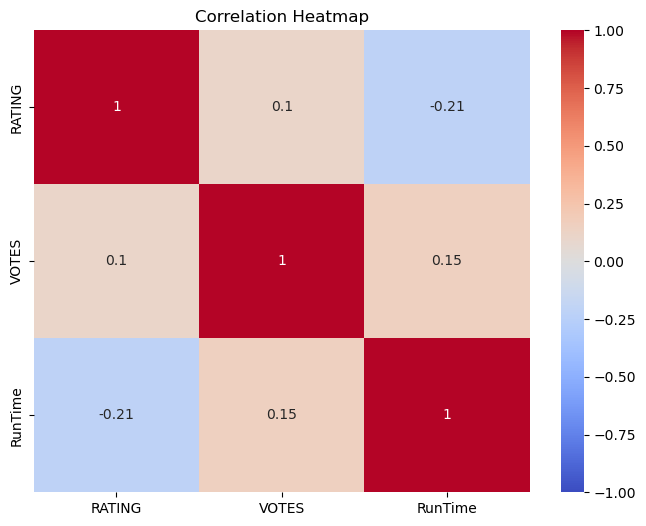

In [875]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[['RATING', 'VOTES', 'RunTime']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


# Univariate analysis 

C:\Users\Akshat\AppData\Local\Temp\ipykernel_7092\2820727671.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['GENRE'], palette='viridis', order=top_genres)


Text(0.5, 1.0, 'Count Plot of Top 20 GENRES')

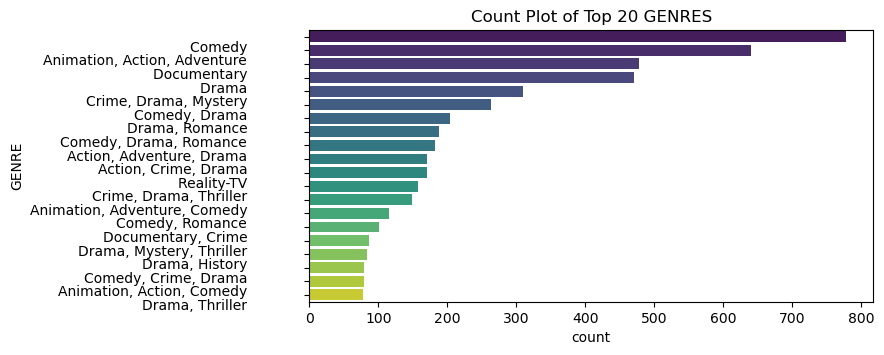

In [876]:
plt.figure(figsize=(16, 12))

# Count plot for the top 20 genres
top_genres = df['GENRE'].value_counts().nlargest(20).index 
plt.subplot(3, 2, 1)
sns.countplot(y=df['GENRE'], palette='viridis', order=top_genres)
plt.title('Count Plot of Top 20 GENRES')


C:\Users\Akshat\AppData\Local\Temp\ipykernel_7092\2013588940.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['YEAR'], palette='coolwarm', order=df['YEAR'].value_counts().iloc[:20].index)


Text(0.5, 1.0, 'Top 20 Most Common Years')

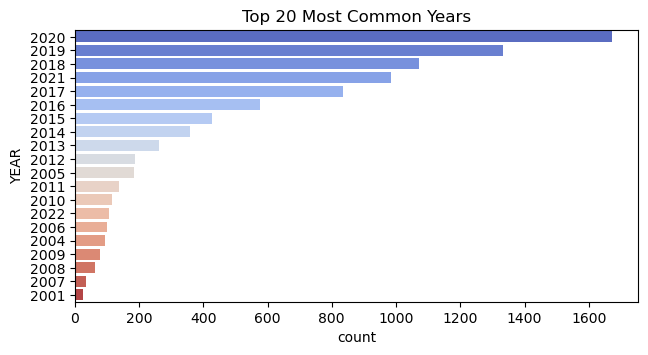

In [877]:
plt.figure(figsize=(16, 12))
plt.subplot(3, 2, 2)
sns.countplot(y=df['YEAR'], palette='coolwarm', order=df['YEAR'].value_counts().iloc[:20].index)
plt.title('Top 20 Most Common Years')

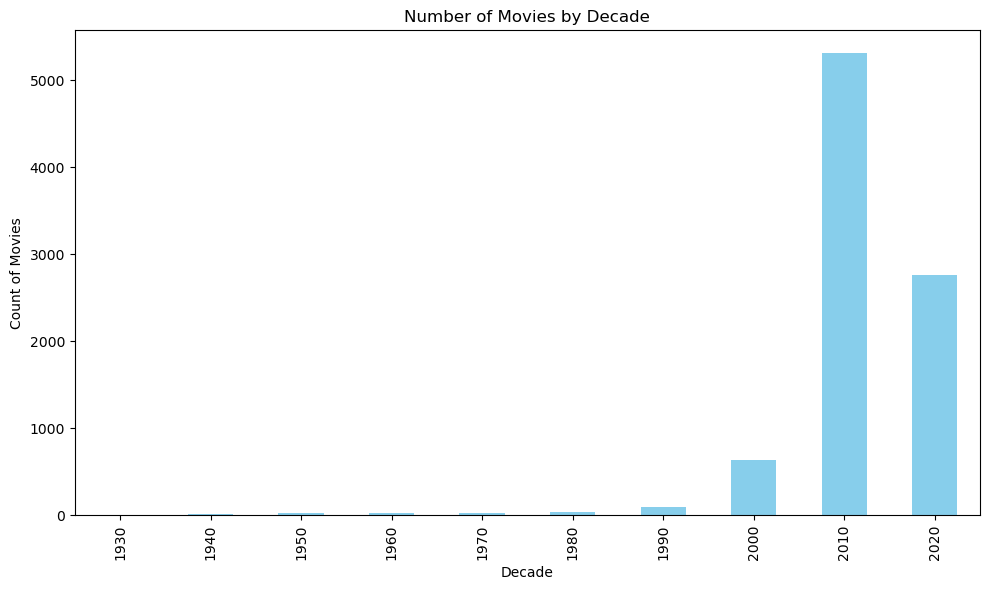

In [878]:

df['DECADE'] = (df['YEAR'] // 10) * 10  
#Group by decade and count the number of entries
decade_counts = df['DECADE'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
decade_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies by Decade')
plt.xlabel('Decade')
plt.ylabel('Count of Movies')
plt.tight_layout()  
plt.show()


Text(0.5, 1.0, 'Boxplot of RATING')

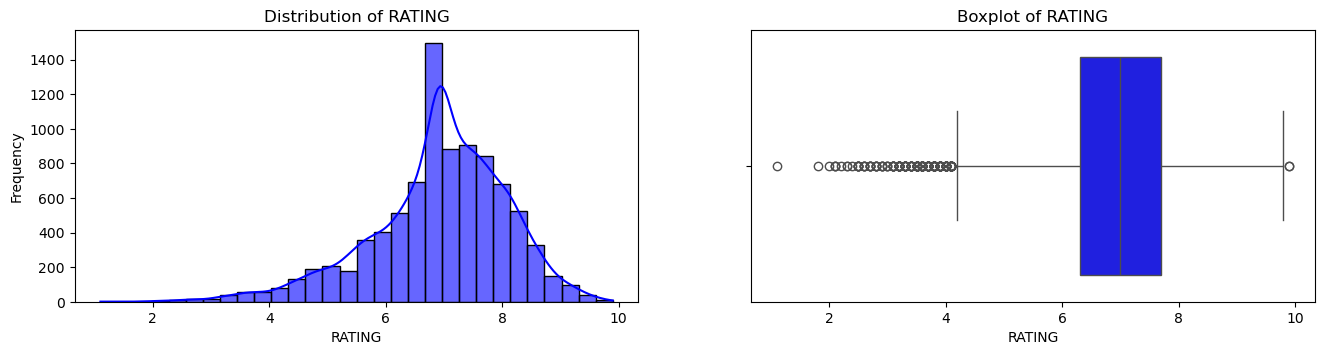

In [879]:

plt.figure(figsize=(16, 12))

plt.subplot(3, 2, 1)
sns.histplot(df['RATING'], bins=30, kde=True, color='blue', alpha=0.6)
plt.title('Distribution of RATING')
plt.xlabel('RATING')
plt.ylabel('Frequency')

plt.subplot(3, 2, 2)
sns.boxplot(x=df['RATING'], color='blue')
plt.title('Boxplot of RATING')




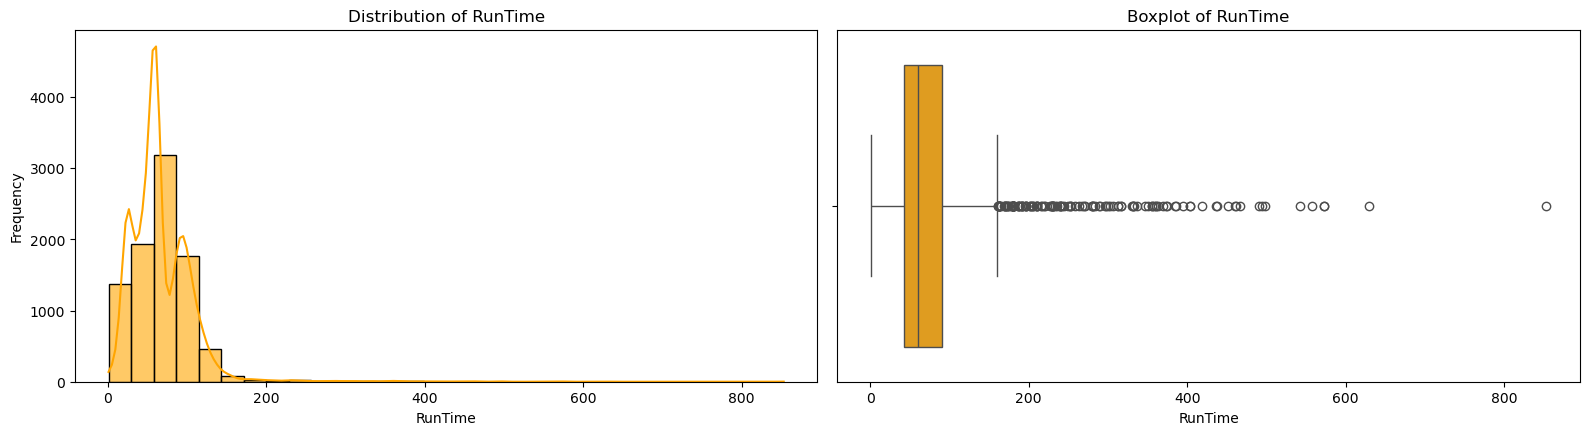

In [880]:

plt.figure(figsize=(16, 12))
plt.subplot(3, 2, 5)
sns.histplot(df['RunTime'], bins=30, kde=True, color='orange', alpha=0.6)
plt.title('Distribution of RunTime')
plt.xlabel('RunTime')
plt.ylabel('Frequency')

plt.subplot(3, 2, 6)
sns.boxplot(x=df['RunTime'], color='orange')
plt.title('Boxplot of RunTime')

plt.tight_layout()
plt.show()


## Bivariate analysis

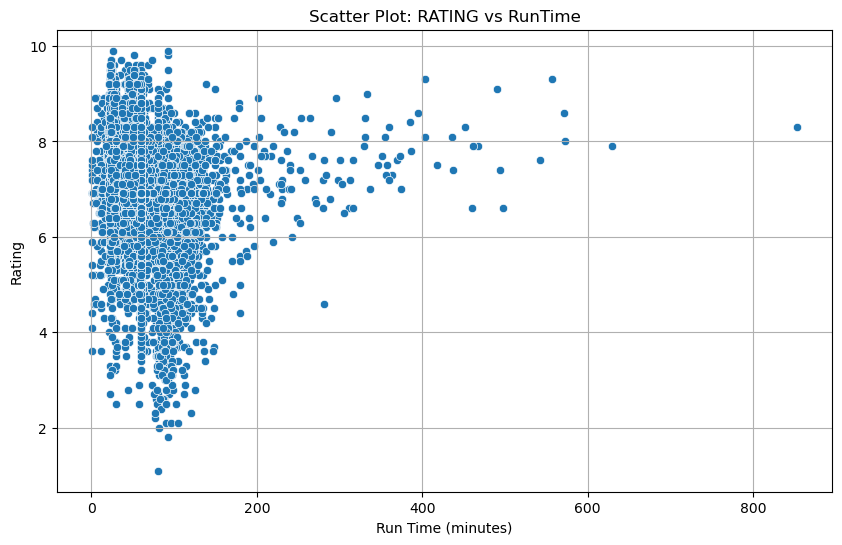

In [881]:
# Scatter Plot between RATING and RunTime
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RunTime', y='RATING')
plt.title('Scatter Plot: RATING vs RunTime')
plt.xlabel('Run Time (minutes)')
plt.ylabel('Rating')
plt.grid()
plt.show()


In [882]:
correlation = df['RATING'].corr(df['RunTime'])
print(f"Correlation between RATING and RunTime: {correlation:.2f}")


Correlation between RATING and RunTime: -0.21


<Figure size 1000x600 with 0 Axes>

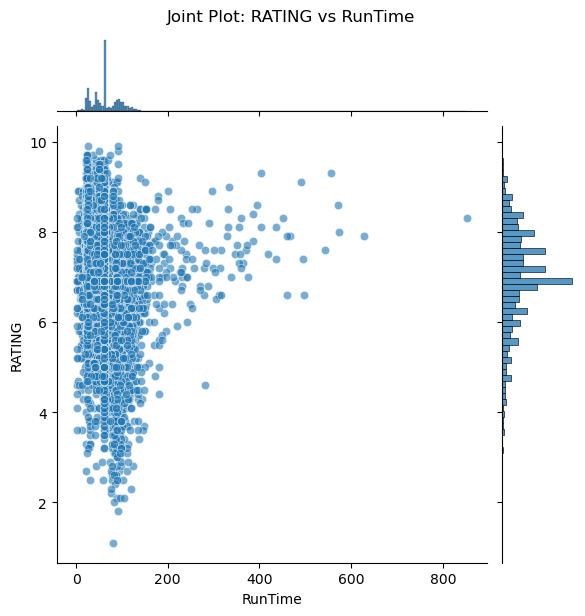

In [883]:

plt.figure(figsize=(10, 6))
sns.jointplot(data=df, x='RunTime', y='RATING', kind='scatter', alpha=0.6)
plt.suptitle('Joint Plot: RATING vs RunTime', y=1.02)
plt.show()


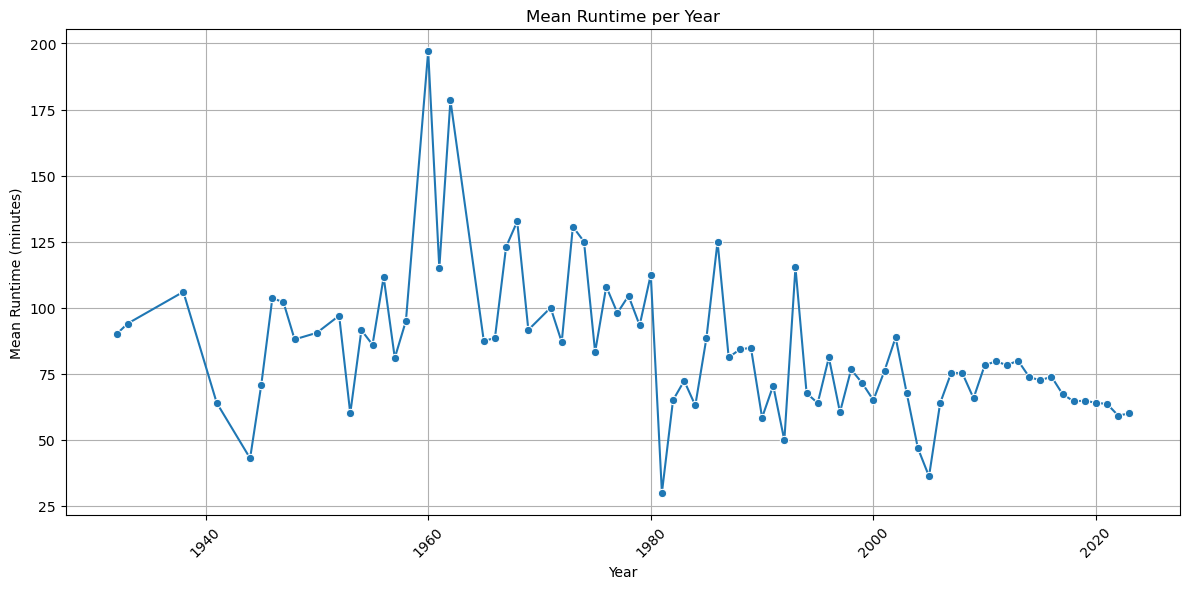

In [884]:
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y', errors='coerce')

mean_runtime_per_year = df.groupby(df['YEAR'].dt.year)['RunTime'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_runtime_per_year, x='YEAR', y='RunTime', marker='o')
plt.title('Mean Runtime per Year')
plt.xlabel('Year')
plt.ylabel('Mean Runtime (minutes)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


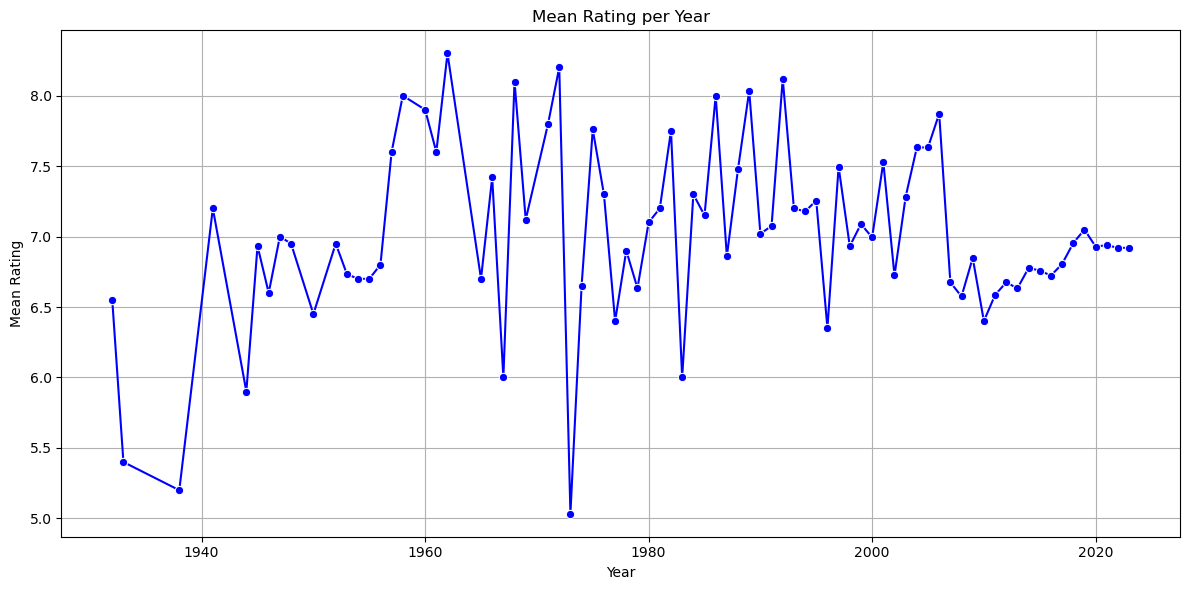

In [885]:

df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y', errors='coerce')

mean_rating_per_year = df.groupby(df['YEAR'].dt.year)['RATING'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_rating_per_year, x='YEAR', y='RATING', marker='o', color='blue')
plt.title('Mean Rating per Year')
plt.xlabel('Year')
plt.ylabel('Mean Rating')

plt.grid()
plt.tight_layout()
plt.show()


C:\Users\Akshat\AppData\Local\Temp\ipykernel_7092\3680418575.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_rating_per_genre, x='RATING', y='GENRE', palette='viridis')


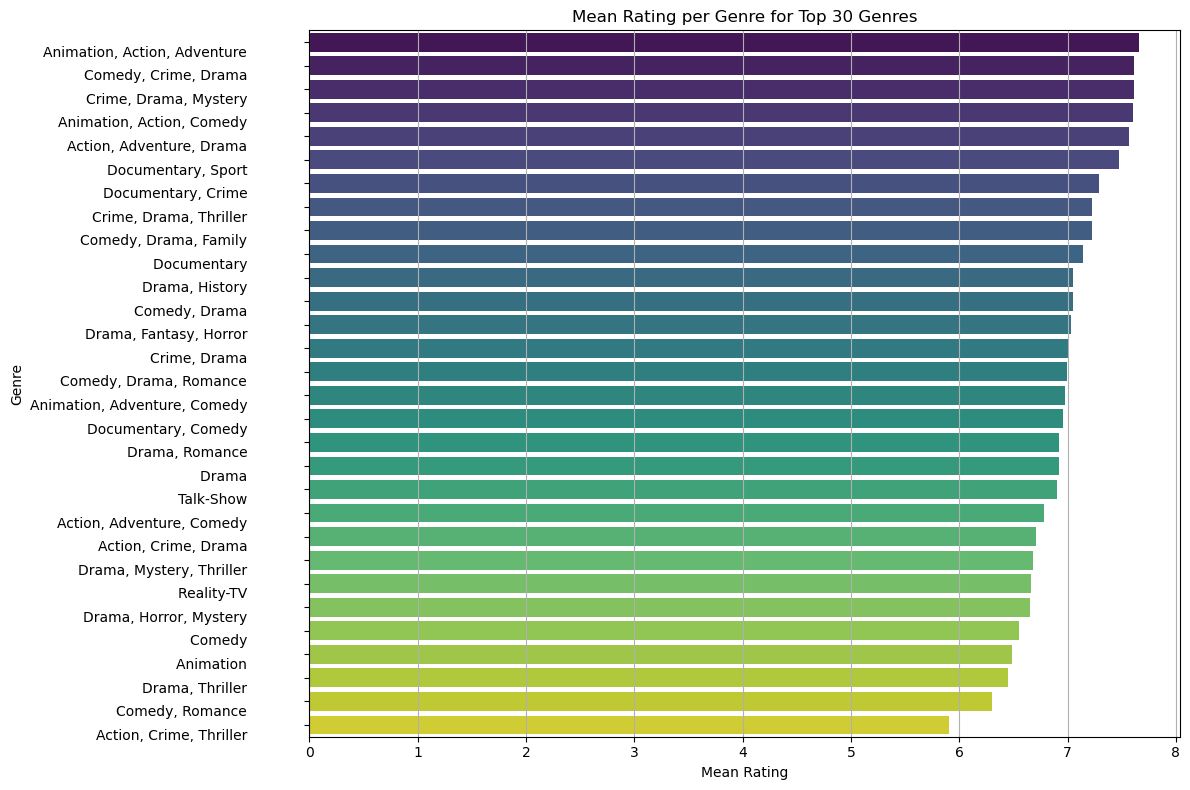

In [886]:
top_genres = df['GENRE'].value_counts().nlargest(30).index

mean_rating_per_genre = df[df['GENRE'].isin(top_genres)].groupby('GENRE')['RATING'].mean().reset_index()

mean_rating_per_genre = mean_rating_per_genre.sort_values(by='RATING', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=mean_rating_per_genre, x='RATING', y='GENRE', palette='viridis')
plt.title('Mean Rating per Genre for Top 30 Genres')
plt.xlabel('Mean Rating')
plt.ylabel('Genre')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


C:\Users\Akshat\AppData\Local\Temp\ipykernel_7092\2571896008.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_rating_per_runtime = df.groupby('RunTime_Bin')['RATING'].mean().reset_index()
C:\Users\Akshat\AppData\Local\Temp\ipykernel_7092\2571896008.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_rating_per_runtime, x='RunTime_Bin', y='RATING', palette='coolwarm')


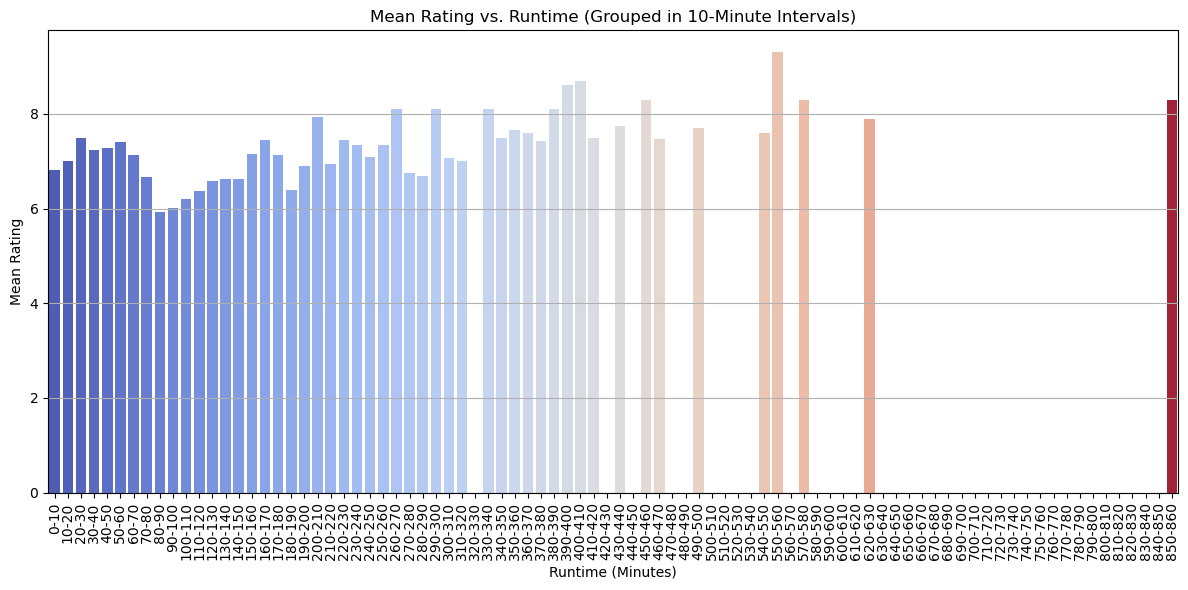

In [887]:

bins = range(0, int(df['RunTime'].max()) + 10, 10)
labels = [f"{i}-{i+10}" for i in bins[:-1]]
df['RunTime_Bin'] = pd.cut(df['RunTime'], bins=bins, labels=labels, right=False)

mean_rating_per_runtime = df.groupby('RunTime_Bin')['RATING'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=mean_rating_per_runtime, x='RunTime_Bin', y='RATING', palette='coolwarm')
plt.title('Mean Rating vs. Runtime (Grouped in 10-Minute Intervals)')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Mean Rating')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
